In [ ]:
!pip install yfinance
!pip install tensorflow
!pip install keras

In [ ]:
#importing all necessary packages
# also using yahoo finance API
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
#setting start & end date & time
finish = datetime.datetime.now()
begin = '2014-06-20'

In [ ]:
#downloading stock price data of Amazon between start and end
#stock = 'AMZN'
Amazon_Data = yf.download ('AMZN', begin, finish)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
#printing out latest 5 stock values
Amazon_Data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-02,166.750000,168.770004,160.550003,167.899994,167.899994,141448400
2024-08-05,154.210007,162.960007,151.610001,161.020004,161.020004,83149400
2024-08-06,161.710007,165.080002,158.539993,161.929993,161.929993,59950800
2024-08-07,166.550003,167.580002,161.429993,162.770004,162.770004,48282000
2024-08-08,165.214996,165.779999,162.550003,164.927002,164.927002,23389886


In [ ]:
#checking size and cleanliness of data
Amazon_Data.shape
Amazon_Data.info()
Amazon_Data.isna().sum()
Amazon_Data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2551 entries, 2014-06-20 to 2024-08-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2551 non-null   float64
 1   High       2551 non-null   float64
 2   Low        2551 non-null   float64
 3   Close      2551 non-null   float64
 4   Adj Close  2551 non-null   float64
 5   Volume     2551 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 139.5 KB


,Open,High,Low,Close,Adj Close,Volume
count,2551.000000,2551.000000,2551.000000,2551.000000,2551.000000,2.551000e+03
mean,93.049091,94.113145,91.885122,93.021219,93.021219,7.770533e+07
std,53.401239,54.028127,52.706229,53.359216,53.359216,4.094037e+07
min,14.220000,14.521000,14.200000,14.347500,14.347500,1.762600e+07
25%,40.960001,41.091249,40.674999,40.906000,40.906000,5.220200e+07
50%,91.032501,91.712997,90.039497,90.925499,90.925499,6.652730e+07
75%,142.745003,144.803001,140.639999,143.189995,143.189995,9.075400e+07
max,200.089996,201.199997,199.050003,200.000000,200.000000,4.771220e+08


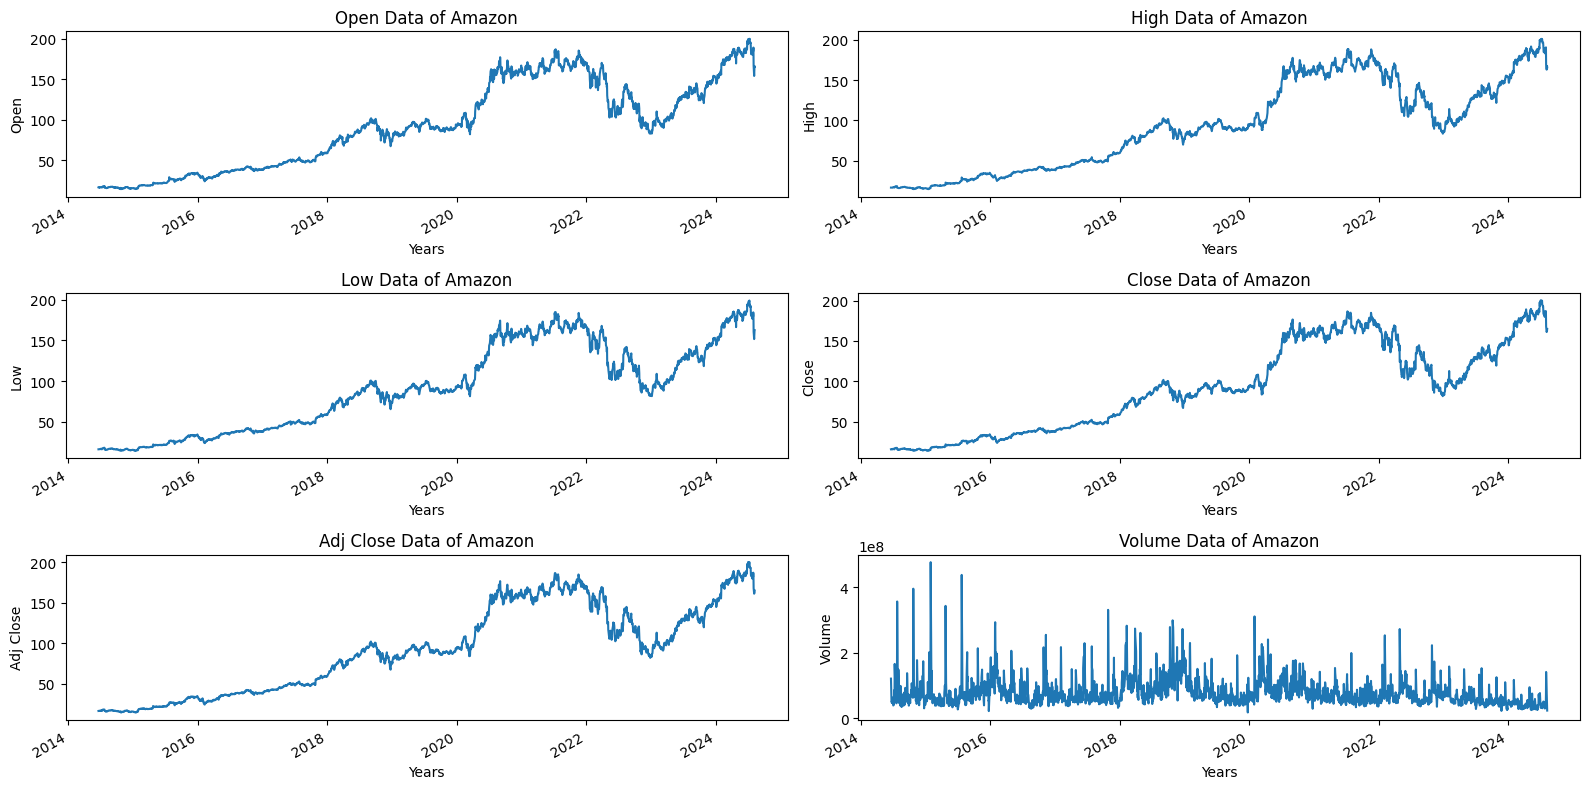

In [ ]:
def plot_graphs(fig, data, col_name, subplot_index):
    plt.subplot(*subplot_index)
    data.plot()
    plt.xlabel('Years')
    plt.ylabel(col_name)
    plt.title(f'{col_name} Data of Amazon')
#creating a figure with desired size
fig = plt.figure(figsize=(16,8))
num_subplots =6
#num_subplots = len(Amazon_Data.columns)
subplot_rows = 3
#subplot_rows = num_subplots // 2 + num_subplots % 2  # Calculate number of rows
subplot_cols = 2  # Fixed number of columns

for index, column in enumerate(Amazon_Data.columns, start=1):
  #calling function
    plot_graphs(fig,Amazon_Data[column],column,(3, 2,index))
    plt.tight_layout()
plt.show()

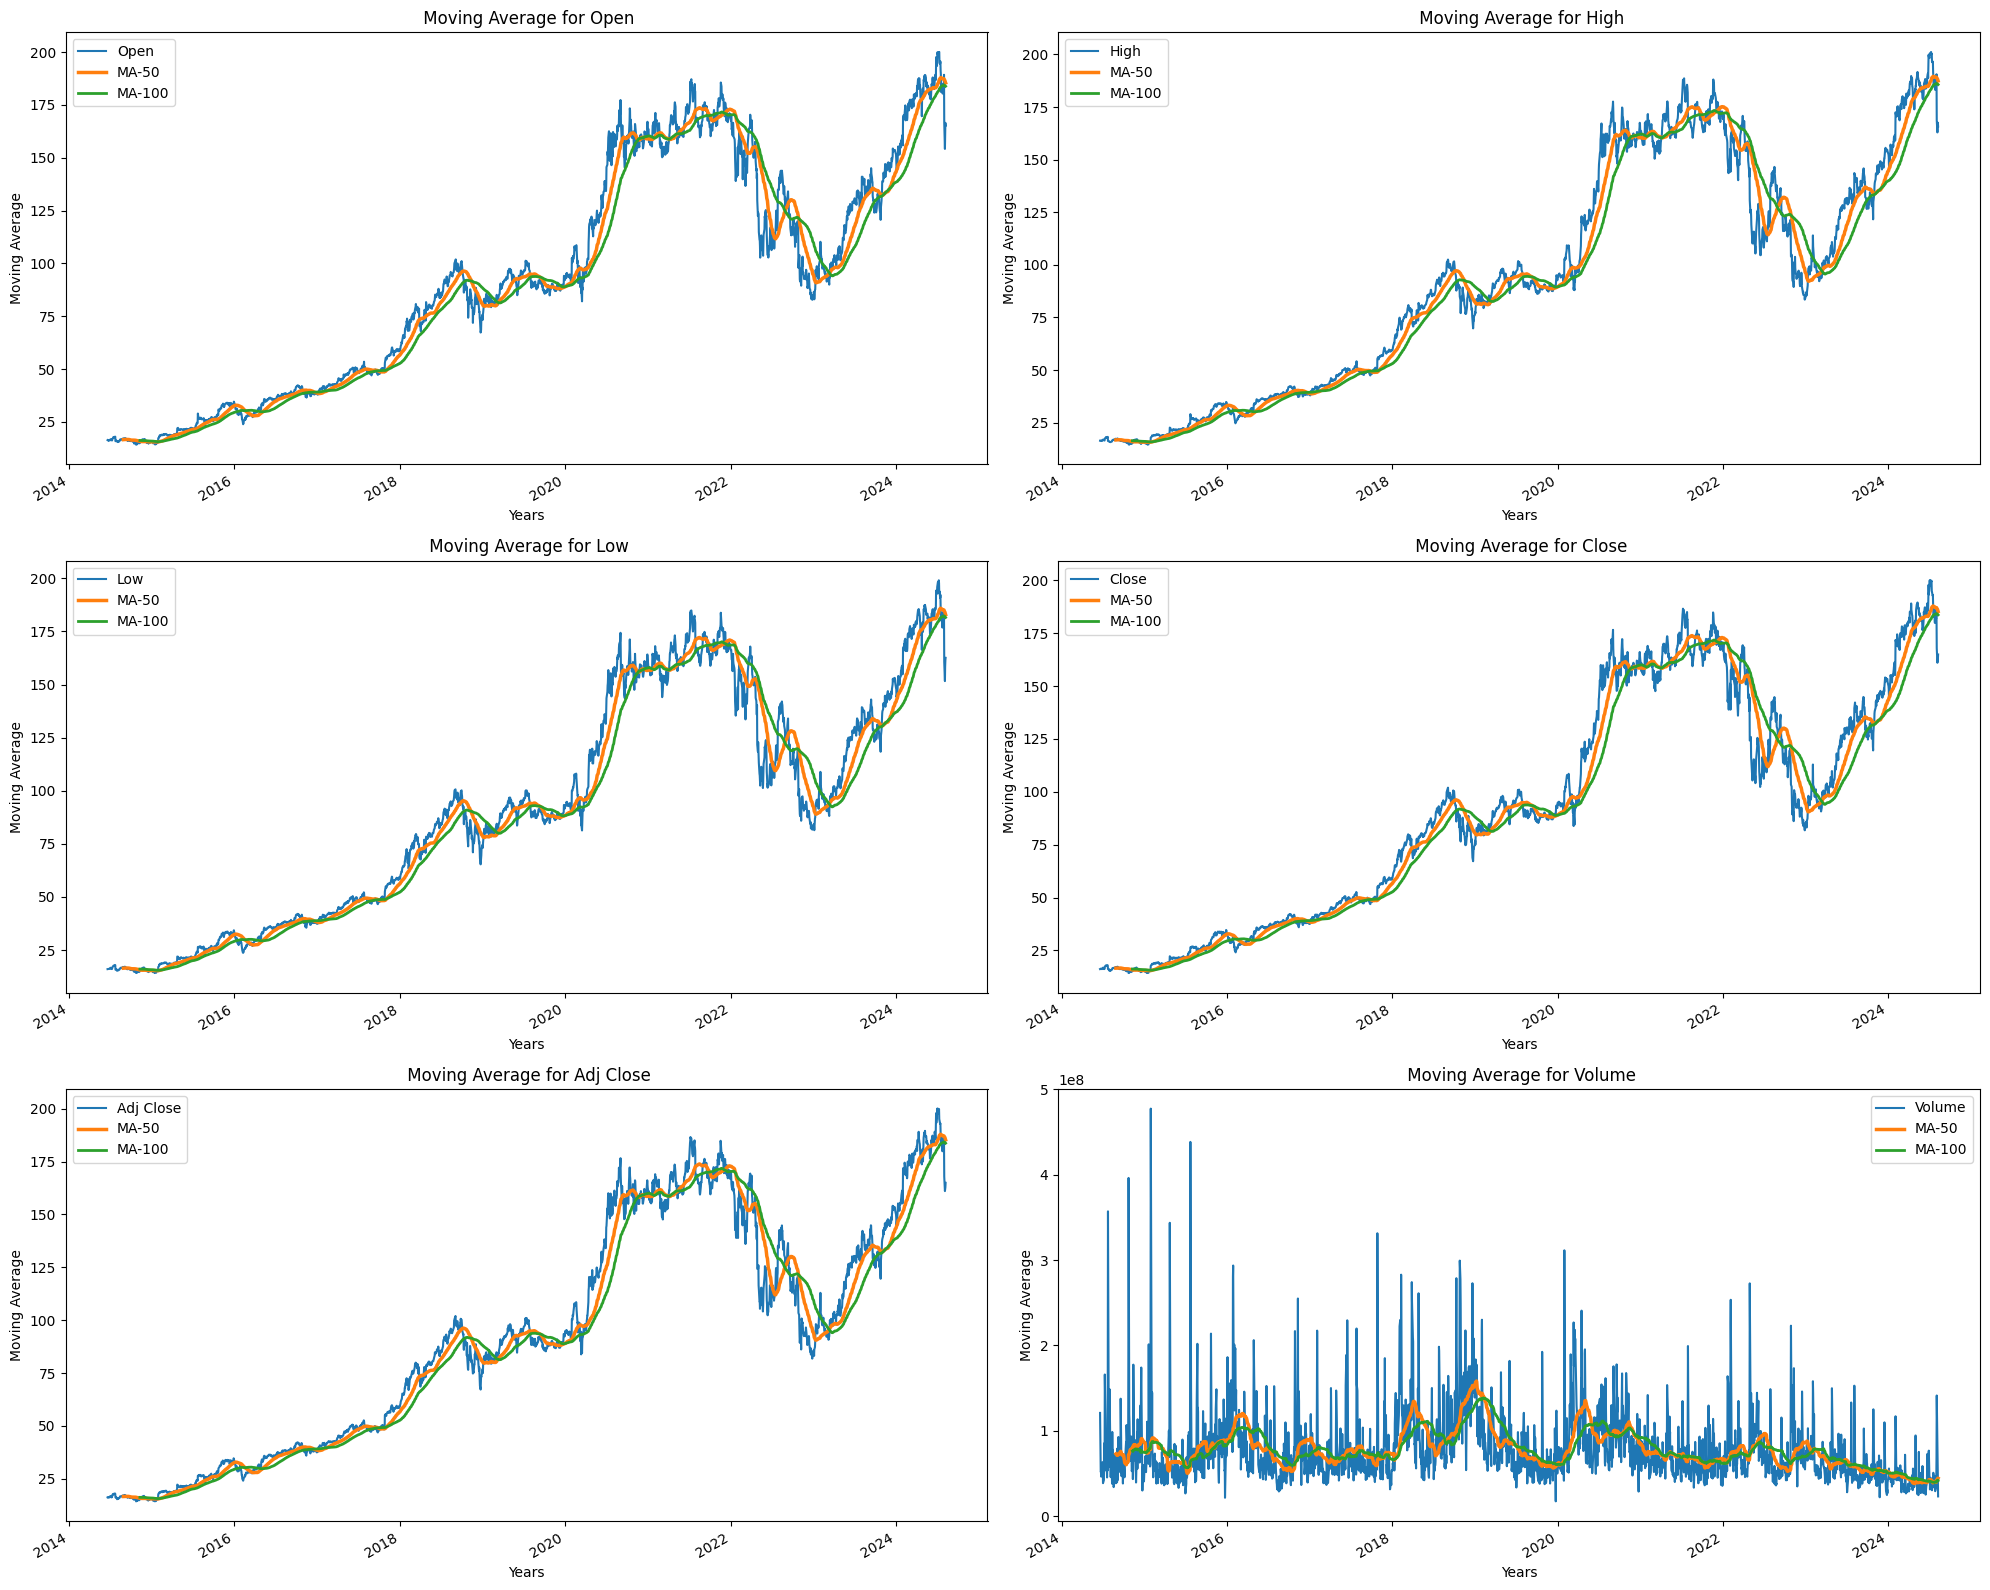

In [ ]:
#moving average concept
def mov_avg(fig , data, val_1 , val_2 , col_name , subplot_index):
    plt.subplot(*subplot_index)
    data.plot(label= f'{col_name}')
    val_1.plot(label= 'MA-50',linewidth=2.5)
    val_2.plot(label= 'MA-100',linewidth=2)
    plt.xlabel('Years')
    plt.ylabel('Moving Average')
    plt.title(' Moving Average for 'f'{col_name}')

fig = plt.figure(figsize=(20, 16))
num_subplots =6
subplot_rows = 3
subplot_cols = 2

for index, column in enumerate(Amazon_Data.columns, start=1):
  ma_50 = Amazon_Data[column].rolling(50).mean()
  ma_100 = Amazon_Data[column].rolling(100).mean()
  #calling fxn
  mov_avg(fig , Amazon_Data[column] , ma_50 , ma_100, column , (subplot_rows, subplot_cols, index))
  plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#splitting data into training and testing
training = pd.DataFrame(Amazon_Data['Adj Close'][0:int(len(Amazon_Data)*0.75)])
testing = pd.DataFrame(Amazon_Data['Adj Close'][int(len(Amazon_Data)*0.75):int(len(Amazon_Data))])
print(training.shape)
print(testing.shape)

(1913, 1)
(638, 1)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
scaled_data_arr = scaler.fit_transform(training)
scaled_data_arr

array([[0.01081446],
       [0.01169704],
       [0.01080286],
       ...,
       [0.79733833],
       [0.7449383 ],
       [0.75597632]])

In [ ]:
len(scaled_data_arr)

1913

In [ ]:
x_val = list()
y_val = list()

for val in range(80, len(scaled_data_arr)):
  x_val.append(scaled_data_arr[val-80:val])
  y_val.append(scaled_data_arr[val])

#x_val = np.array([scaled_data_arr[val-80:val] for val in range(80, len(scaled_data_arr))])
#y_val = np.array([scaled_data_arr[val] for val in range(80, len(scaled_data_arr))])

In [ ]:
x_val= np.array(x_val)
y_val= np.array(y_val)

In [ ]:
x_val.shape

(1833, 80, 1)

In [ ]:
y_val.shape

(1833, 1)

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
!pip install --upgrade tensorflow


In [ ]:
model = Sequential()
model.add(LSTM(80, return_sequences=True, input_shape=(x_val.shape[1], 1)))
model.add(Dropout(0.1))
#unit= 50 || (x_val.shape[1], 1) = 80 and column 1
#if we want to work on other columns then column no will increase, here its that is closing column
model.add(LSTM(85, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(110, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(105, return_sequences=False))
model.add(Dropout(0.2))

#model.add(Dense(5, activation= 'relu'))
#model.add(Dropout(0.1))
model.add(Dense(25, activation= 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(), loss='mean_squared_error')

#mean_squared_error= beacuse we are doing time series analysis

In [ ]:
model.fit(x_val, y_val, epochs=20)

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 37s 384ms/step - loss: 0.0559
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 34s 275ms/step - loss: 0.0051
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 279ms/step - loss: 0.0067
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 272ms/step - loss: 0.0054
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 295ms/step - loss: 0.0040
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - loss: 0.0036
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 273ms/step - loss: 0.0034
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 277ms/step - loss: 0.0041
Epoch 9/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 298ms/step - loss: 0.0036
Epoch 10/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 278ms/step - loss: 0.0035
Epoch 11/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 20s 269ms/step - loss: 0.0034
Epoch 12/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 271ms/step - loss: 0.0029
Epoch 13/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 281ms/step - loss: 0.0038
Epoch 14/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 21s 289ms/step - loss: 0.0031
Epoch 15/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 22s 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 80, 80)              │          26,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 80, 80)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 80, 85)              │          56,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 80, 85)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 80, 110)             │          86,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 80, 110)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 105)                 │          90,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 105)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           2,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 25)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 786,950 (3.00 MB)

 Trainable params: 262,316 (1.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 524,634 (2.00 MB)

In [ ]:
testing.head()

,Adj Close
Date,
2022-01-25,139.985992
2022-01-26,138.872498
2022-01-27,139.637497
2022-01-28,143.977997
2022-01-31,149.573502


In [ ]:
prev_80 = training.tail(80)

In [ ]:
final = pd.concat([prev_80, testing], ignore_index=True)

In [ ]:
final.head()

,Adj Close
0,164.251999
1,164.162994
2,159.488998
3,161.050003
4,163.100494


In [ ]:
input_values = scaler.fit_transform(final)
input_values

array([[0.69751226],
       [0.69675913],
       [0.65720933],
       [0.67041803],
       [0.68776861],
       [0.70486974],
       [0.69902691],
       [0.68112204],
       [0.6815578 ],
       [0.69719077],
       [0.70378233],
       [0.74996619],
       [0.76592491],
       [0.76482911],
       [0.75252163],
       [0.76096212],
       [0.71888218],
       [0.71245975],
       [0.73602553],
       [0.74297255],
       [0.76585299],
       [0.73448558],
       [0.71150366],
       [0.70923589],
       [0.73938058],
       [0.77872742],
       [0.79649258],
       [0.78379595],
       [0.82070987],
       [0.78086388],
       [0.77682349],
       [0.79909889],
       [0.80778471],
       [0.80567781],
       [0.80918935],
       [0.87140797],
       [0.86316218],
       [0.8191614 ],
       [0.82232187],
       [0.82247836],
       [0.79038752],
       [0.81450759],
       [0.79144949],
       [0.76464719],
       [0.76195631],
       [0.74183028],
       [0.75772973],
       [0.798

In [ ]:
print(input_values.shape)
print(len(input_values))

(718, 1)
718


In [ ]:
x_test= list()
y_test = list()

for item in range(80, len(input_values)):
  x_test.append(input_values[item-80:item])
  y_test.append(input_values[item])

In [ ]:
x_test= np.array(x_test)
y_test= np.array(y_test)

In [ ]:
print(x_test.shape)
print(y_test.shape)

(638, 80, 1)
(638, 1)


In [ ]:
pred = model.predict(x_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step


In [ ]:
pred.shape

(638, 1)

In [ ]:
final_pred = scaler.inverse_transform(pred)

In [ ]:
final_pred

array([[159.01013 ],
       [157.53162 ],
       [155.79372 ],
       [153.87154 ],
       [151.90361 ],
       [150.07553 ],
       [148.5452  ],
       [147.39493 ],
       [146.52324 ],
       [145.9856  ],
       [145.8355  ],
       [146.10979 ],
       [146.78404 ],
       [147.76025 ],
       [148.8597  ],
       [149.9412  ],
       [150.92421 ],
       [151.78488 ],
       [152.48903 ],
       [152.99881 ],
       [153.2774  ],
       [153.26672 ],
       [153.01396 ],
       [152.62297 ],
       [152.19054 ],
       [151.76358 ],
       [151.37387 ],
       [150.99841 ],
       [150.58968 ],
       [150.03812 ],
       [149.2619  ],
       [148.27298 ],
       [147.20401 ],
       [146.17879 ],
       [145.2489  ],
       [144.48553 ],
       [143.99007 ],
       [143.85971 ],
       [144.16644 ],
       [144.91032 ],
       [146.0588  ],
       [147.51613 ],
       [149.16107 ],
       [150.88315 ],
       [152.62848 ],
       [154.35637 ],
       [155.9954  ],
       [157.4

In [ ]:
y_test_inv = scaler.inverse_transform(y_test)

In [ ]:
y_test_inv

array([[139.98599243],
       [138.87249756],
       [139.63749695],
       [143.97799683],
       [149.57350159],
       [151.1934967 ],
       [150.61250305],
       [138.84550476],
       [157.63949585],
       [157.9355011 ],
       [161.41349792],
       [161.1894989 ],
       [159.00349426],
       [153.29350281],
       [155.16700745],
       [156.51049805],
       [158.10049438],
       [154.65249634],
       [152.60150146],
       [150.19749451],
       [144.82699585],
       [151.35800171],
       [153.78849792],
       [153.56300354],
       [151.14199829],
       [152.05250549],
       [147.89849854],
       [145.64100647],
       [137.45300293],
       [136.01449585],
       [139.27900696],
       [146.81750488],
       [145.52450562],
       [141.85299683],
       [147.36650085],
       [153.10400391],
       [157.23899841],
       [161.25050354],
       [161.49150085],
       [164.88900757],
       [163.40800476],
       [163.64950562],
       [164.77349854],
       [168

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test_inv and final_pred are your actual and predicted values respectively
mse = mean_squared_error(y_test_inv, final_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inv, final_pred)

# Print the results
print("Root mean squared error:", rmse)
print("R-squared score:", r2)


Root mean squared error: 8.430299527652332
R-squared score: 0.9221538567768636


In [ ]:
training_len=len(training)
final_plot = pd.DataFrame(
    {
        'original_test' : y_test_inv.reshape(-1),
        'prediction' : final_pred.reshape(-1)
    },
    index = Amazon_Data.index[training_len: ]
)
final_plot.head()

,original_test,prediction
Date,,
2022-01-25,139.985992,159.010132
2022-01-26,138.872498,157.531616
2022-01-27,139.637497,155.793716
2022-01-28,143.977997,153.871536
2022-01-31,149.573502,151.903610


<Figure size 640x480 with 0 Axes>

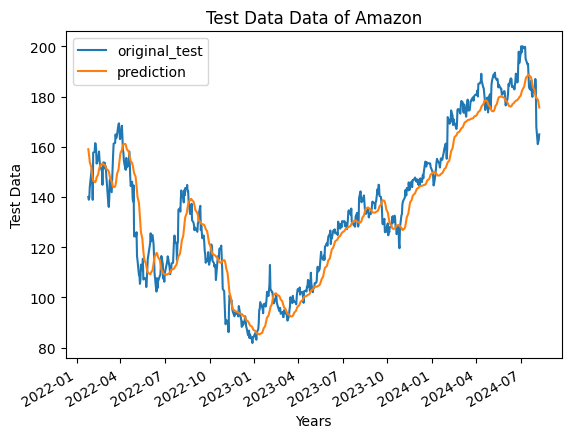

In [ ]:
def final_graph(fig, values, col_name):
  plt.figure()
  values.plot(fig = fig)
  plt.xlabel('Years')
  plt.ylabel(col_name)
  plt.title(f'{col_name} Data of Amazon')
#creating a figure with desired size

#calling function
final_graph((15,6),final_plot, 'Test Data')
plt.show()

In [ ]:
model.save('Stk_Pri_Pred.h5')